In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
from google.colab import files


In [ ]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [ ]:
uploaded = files.upload()


Saving gym_members_exercise_tracking.csv to gym_members_exercise_tracking (1).csv


In [ ]:

df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## **Анализ**
Обратим внимание на ряд числовых показателей:

- Age  
  Среднее значение возраста 38.68, что близко к значению медианы (50% квантиля, 40 лет), но немного меньше него. Следует проверить выборку возрастов посетителей на нормальность
- Calories_burned  
  Среднее число сожжённых калорий за тренировку составляет 905.42, это больше медианы (893), но, может быть, незначительно в рамках масштаба измерений, требует дополнительного анализа
- Session_Duration (hours)  
  Средняя продолжительность тренировки составляет 1.256 часа, что очень близко к медианному значению. Так же проверим длительность тренировки на нормальность

In [ ]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


Пропущенных значений в датасете нет

# **Проверка на нормальное распределение**

## **Визуальный анализ (гистограммы)**

Строим гистограммы интересующих признаков (Age, Calories_Burned, Session_Duration (hours)), наложим поверх гистограмм вид нормального распределения с параметрами, рассчитанными на основе выборок  
По гистограмме видим, что Age точно распределено не нормально

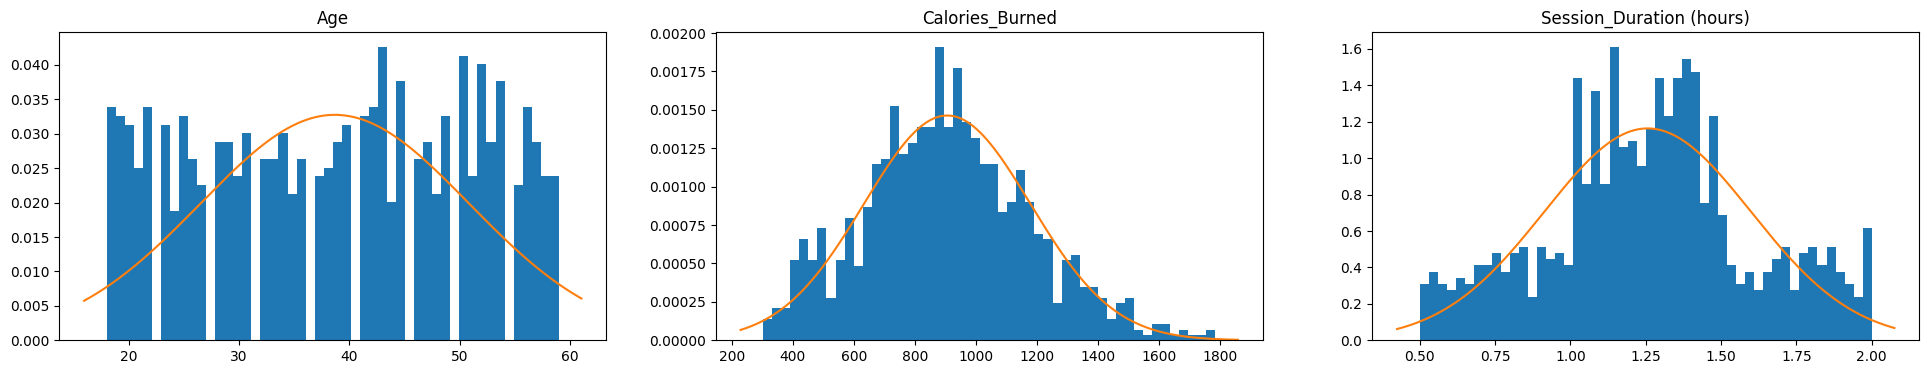

In [ ]:
keys = ['Age', 'Calories_Burned', 'Session_Duration (hours)']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=50)

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=df[key].mean(), scale=df[key].std())

    ax.plot(x, y)
    ax.set_title(key)

## **Визуальный анализ (квантили)**

Построим Q-Q кривую — график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением.

Чем ближе графики, тем ближе распределение значений выборки к нормальному.

Как и выяснено ранее, Age не является нормально распределённым. Session_duration (hours) ближе к нормальному распределению, Calories_Burned совсем близко к нему

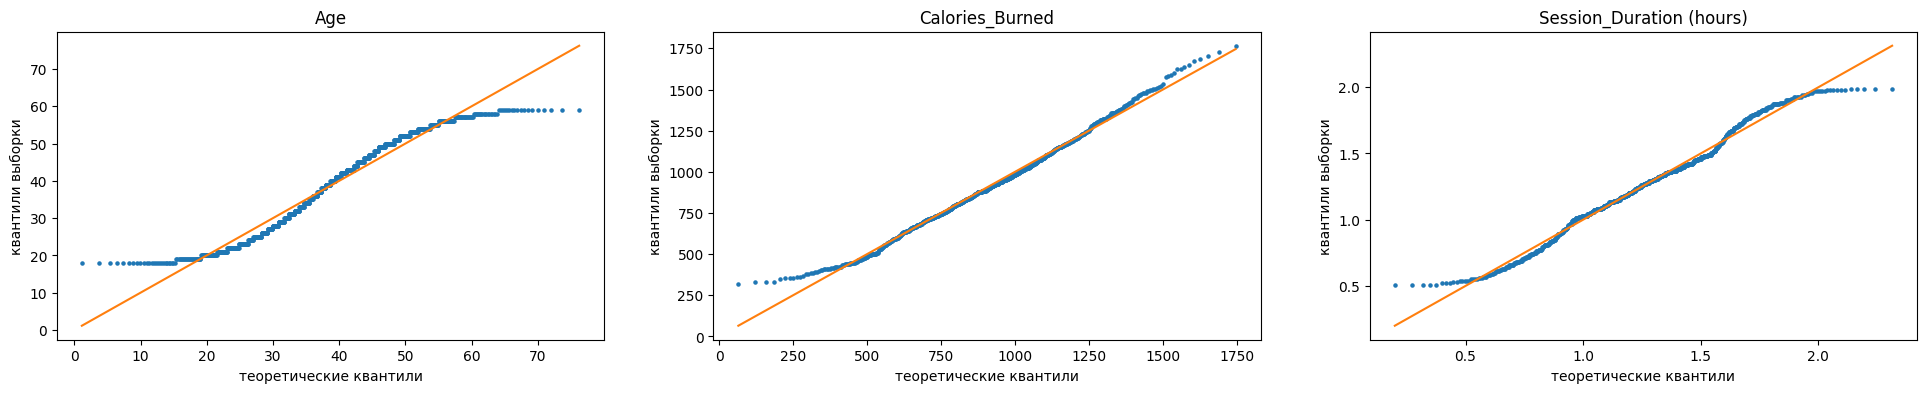

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=samples.mean(), scale=samples.std())
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

## **Стастические показатели для выборок**
Оценим нормальность выборок также на основании известных характеристик нормального распределения. В частности:

Вероятность попасть в интервал от μ - σ до μ + σ равна 0.68,  
В интервал от μ - 2σ до μ + 2σ — 0.95,  
В интервал от μ - 3σ до μ + 3σ — 0.997.  
Если расчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

На основании такой оценки Calories_Burned и Session_Duration (hours) достаточно близки к нормальному распределению, в отличие от Age

In [ ]:

for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

Age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.566289825282631
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		1.0
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Calories_Burned
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6937307297019527
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9568345323741008
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9969167523124358

Session_Duration (hours)
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6762589928057554
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9506680369989723
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0



## **Регрессия между длительностью тренировки и потраченными калориями**

### **Визуализация**

По графику можно выявить близкую к линейной зависимость между длительностью тренировки и числу сожжённых калорий. Кроме того, чем больше длительность тренировки, тем сильнее разброс числа сожжённых калорий

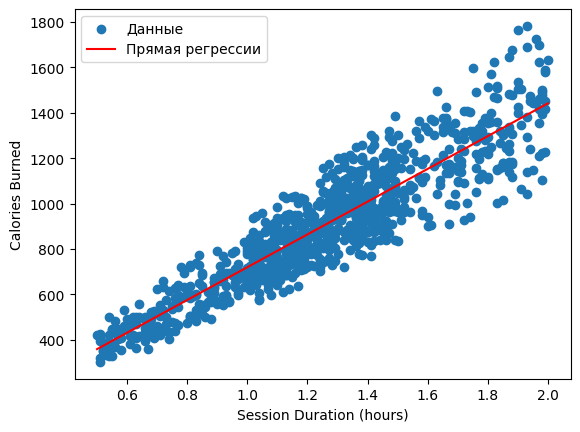

In [ ]:
b1 = np.cov(df['Calories_Burned'], df['Session_Duration (hours)'], ddof=1)[0, 1] / np.var(df['Session_Duration (hours)'], ddof=1)
b0 = df['Calories_Burned'].mean() - b1 * df['Session_Duration (hours)'].mean()

plt.scatter(df['Session_Duration (hours)'], df['Calories_Burned'], label='Данные')
x = np.linspace(0.5, 2.0, 1000)
y = b0 + b1 * x
plt.plot(x, y, color='r', label="Прямая регрессии")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.legend()
plt.show()

### **Расчёт регрессии и проверка значимости**



Рассчитываем коэффициенты регрессии для каждого из значений выборок. В результате видим, что коэффициент детерминации R^2 достаточно высокий (~0.8247), существует сильная линейная зависимость между временем тренировки и количеством сожжённых калорий

In [ ]:
n = len(df['Session_Duration (hours)'].values)
ones = np.ones((n, 1))
x_pot = np.hstack((ones, df['Session_Duration (hours)'].values.reshape(n, 1)))

In [ ]:
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Calories_Burned'])
y_pred = x_pot.dot(b)
residuals = df['Calories_Burned'] - y_pred

In [ ]:
R = 1 - sum_of_squares(residuals) / sum_of_squares(np.array(df['Calories_Burned']))
R


0.8247189416623428

## **Построение корреляционной матрицы для числовых признаков**

По корреляционной матрице для числовых значений датасета видим, что наиболее выражена зависимость, близкая к линейной для длительности тренировки и количеством сожжённых калорий, так же прослеживается высокая положительная корреляция между:
- весом и BMI (индекс массы тела)
- уровнем подготовки и частотой тренировок (дней в неделю)
- уровнем подготовки и длительностью тренировок

Также заметна средняя отрицательная корреляция между:
- уровнем подготовки и процентом жира
- процентом жира и сжигаемыми калориями

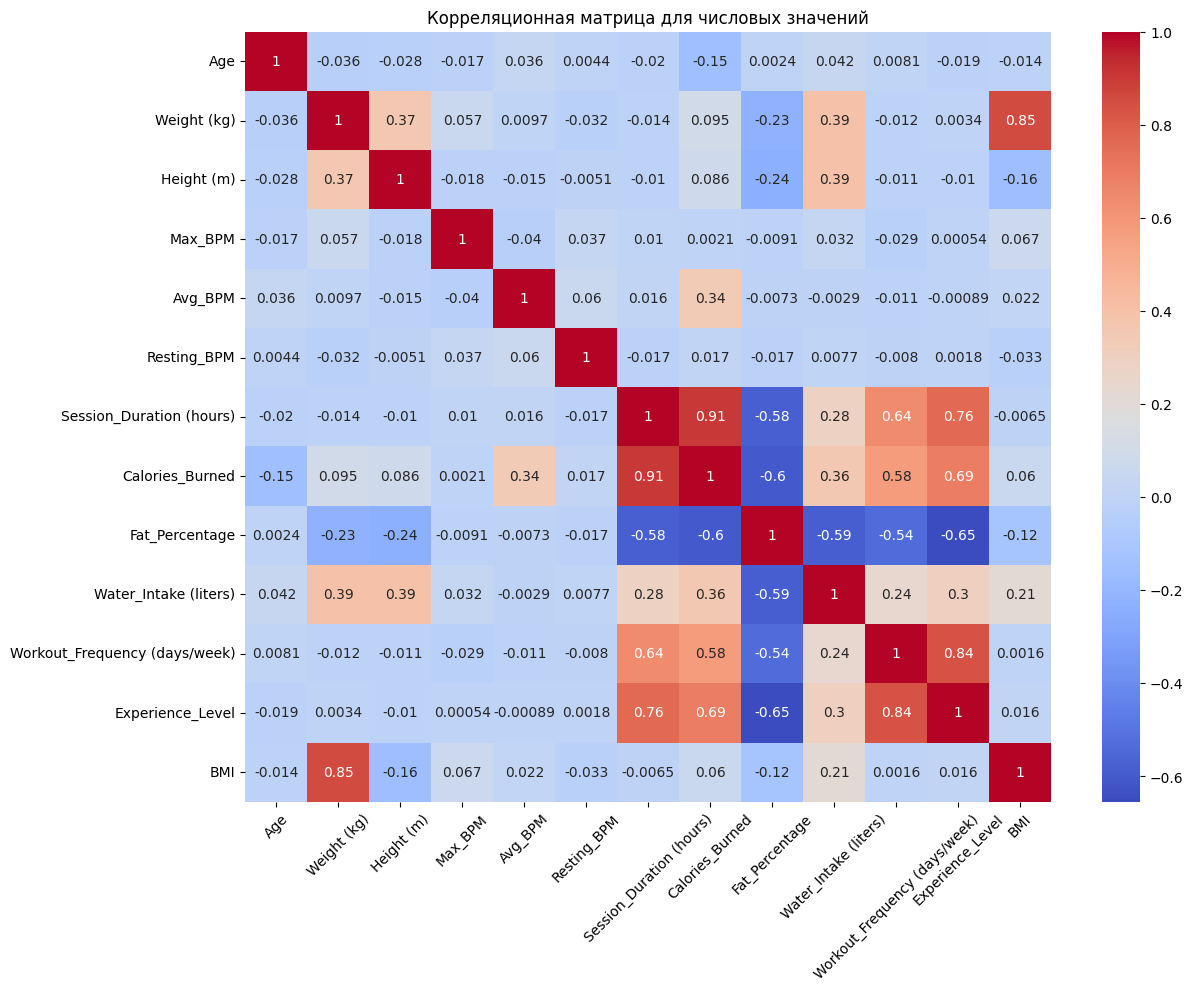

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица для числовых значений')
plt.xticks(rotation=45)
plt.show()


x1 and x2 = 0.89 — плохо для лин. регрессии, две независимые переменные сильно коррелируют, что может привести к мультиколлинеарности (нужно исключить одну из переменных из модели)  
y and x5 = 0.9 — хорошо, независимая переменная x5 сильно коррелирует с зависимой y, а значит, хорошо объясняет изменения в y  
y and x1 = 0.2 — плохо, x1 слабо коррелирует с зависимой переменной (слабая линейная связь), включение x1 в модель скорее всего малоэффективно  
x2 and x5 = 0.004 - хорошо, две независимые переменные практически не коррелируют, что полезно для модели и избежания мультиколлинеарности

## **Влияние типа тренировки на количество сожжённых калорий**



Проанализируем, влияет ли тип тренировки на сжигаемые калории  
Построив боксплоты для разных типов тренировок, видим, что распределения по типам тренировок схожи: медианы находятся на уровне около 900 калорий, межквартильные размахи тоже отличаются совсем незначительно, можем сделать вывод, что число сожжённых калорий не зависит от типа тренировки  
Наблюдаются положительные выбросы для HIIT, Strength и Cardio, что может быть связано с различиями в интенсивности тренировок одного типа

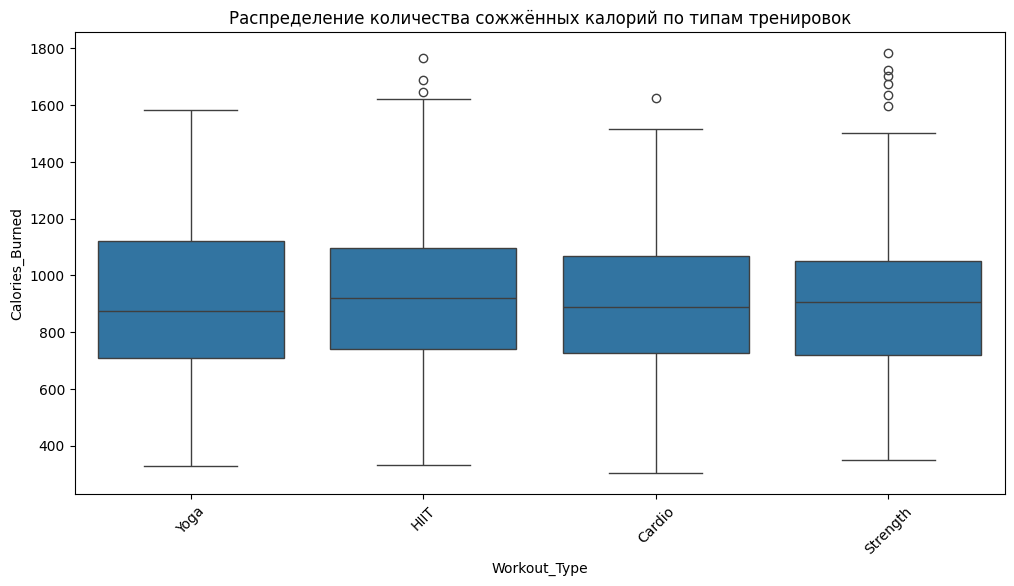

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Распределение количества сожжённых калорий по типам тренировок')
plt.xticks(rotation=45)
plt.show()

### **ANOVA тест (дисперсионный анализ)**

Проведя дисперсионный анализ, видим, что
- F = 0.949 (измеряет, как различаются группы по сравнению с общей дисперсией) близко к 1, значит, различия между группами примерно равны вариациям внутри групп, что указывает на отсутствие значимых различий между типами тренировок в контексте сожжённых калорий
- p = 0.416 > 0.05, что указывает на отсутствие статистически значимых различий в количестве сожжённых калорий между различными типами тренировок, что подтверждает выводы из графика выше

In [ ]:
anova_results = sm.stats.anova_lm(ols('Calories_Burned ~ Workout_Type', data=df).fit())
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
Workout_Type,3.0,2.116701e+05,70556.703442,0.949043,0.41624
Residual,969.0,7.204039e+07,74345.089042,NaN,NaN


##**Выводы**


В ходе анализа поведения посетителей спортзала выявлена очевидная линейная зависимость между длительностью тренировки и количеством сожжённых калорий: чем дольше тренировка, тем больше калорий сжигает человек. Это вполне ожидаемо, так как продолжительные тренировки требуют больше энергии.

При анализе влияния типа тренировки на количество сожжённых калорий, оказалось, что средние показатели сжигаемых калорий для разных видов тренировок мало отличаются друг от друга. Статистически значимых различий выявлено не было, что может означать либо схожую интенсивность тренировок, либо то, что посетители выбирают типы занятий, которые соответствуют их уровню физической подготовки и целям, а не каким-то критериям эффективности сжигания калорий.

Таким образом, для тех, кто хочет увеличить количество сожжённых калорий, ключевым фактором является продолжительность тренировки, а не её тип